# Linear Regression

# 1. Preparing Dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
dataset = pd.read_csv('data.csv')

__We want to be able to predict `Y` which is our price variable.__ 

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [29]:
#list our columns 
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
#show first 5 records
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding `NaN` values__

In [31]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


__Compute correlation between variables and our predictor variable__

In [32]:
dataset = dataset.drop(['id', 'date'], axis=1)
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [33]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:
import statsmodels.api as sml
from statsmodels import tools

X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = Y,exog =  X_new).fit()

regressor_OLS.summary()

OLS Regression Results 
 
 Dep. Variable: price R-squared: 0.700 
 
 
 Model: OLS Adj. R-squared: 0.700 
 
 
 Method: Least Squares F-statistic: 2960. 
 
 
 Date: Wed, 26 May 2021 Prob (F-statistic): 0.00 
 
 
 Time: 13:32:52 Log-Likelihood: -2.9460e+05 
 
 
 No. Observations: 21613 AIC: 5.892e+05 
 
 
 Df Residuals: 21595 BIC: 5.894e+05 
 
 
 Df Model: 17 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 6.69e+06 2.93e+06 2.282 0.022 9.44e+05 1.24e+07 
 
 
 bedrooms -3.577e+04 1891.843 -18.906 0.000 -3.95e+04 -3.21e+04 
 
 
 bathrooms 4.114e+04 3253.678 12.645 0.000 3.48e+04 4.75e+04 
 
 
 sqft_living 110.4404 2.270 48.661 0.000 105.992 114.889 
 
 
 sqft_lot 0.1286 0.048 2.683 0.007 0.035 0.223 
 
 
 floors 6689.5501 3595.859 1.860 0.063 -358.599 1.37e+04 
 
 
 waterfront 5.83e+05 1.74e+04 33.580 0.000 5.49e+05 6.17e+05 
 
 
 view 5.287e+04 2140.055 24.705 0.000 4.87e+04 5.71e+04 
 
 
 condition 2.639e+04 2351.461 11.221 0.000 2.18e+04 3.1e+04 
 
 
 grade 9.589e+04 2152.789 44.542 0.000 9.17e+04 1e+05 
 
 
 sqft_above 70.7877 2.253 31.415 0.000 66.371 75.204 
 
 
 sqft_basement 39.6601 2.647 14.985 0.000 34.473 44.848 
 
 
 yr_built -2620.2232 72.659 -36.062 0.000 -2762.640 -2477.806 
 
 
 yr_renovated 19.8126 3.656 5.420 0.000 12.647 26.978 
 
 
 zipcode -582.4199 32.986 -17.657 0.000 -647.074 -517.765 
 
 
 lat 6.027e+05 1.07e+04 56.149 0.000 5.82e+05 6.24e+05 
 
 
 long -2.147e+05 1.31e+04 -16.349 0.000 -2.4e+05 -1.89e+05 
 
 
 sqft_living15 21.6814 3.448 6.289 0.000 14.924 28.439 
 
 
 sqft_lot15 -0.3826 0.073 -5.222 0.000 -0.526 -0.239 
 
 
 
 
 Omnibus: 18384.201 Durbin-Watson: 1.990 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 1868224.491 
 
 
 Skew: 3.566 Prob(JB): 0.00 
 
 
 Kurtosis: 47.985 Cond. No. 4.99e+17 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The smallest eigenvalue is 8.81e-22. This might indicate that there are strong multicollinearity problems or that the design matrix is singular.

# 2. Linear Regression Implementation

We have one dependent variable (feature) and one independent variable (here we will take square roots). Our goal is to estimate $\hat{y} = x {\theta_1} + \theta_0$, where $\theta_1$ is our coefficient and $\theta_0$ is our `Y` intercept. To estimate $\hat{y}$ we need to find a function such as $\hat{y} = h(x) = x {\theta_1} + \theta_0$

__We first start by creating our `x` and `y` variables. Then plotting to gain an intuition on how the data looks like.__

In [35]:
x = X[['sqft_living']]
y = Y

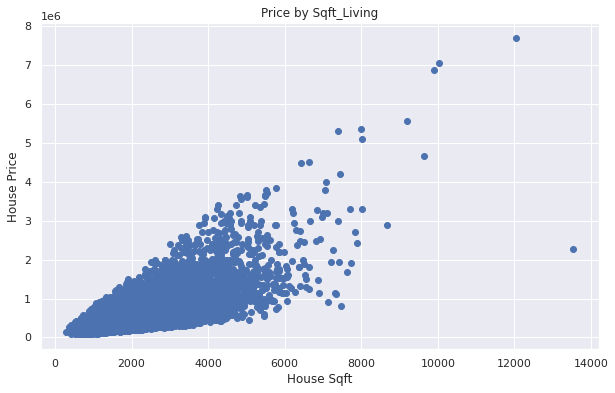

In [42]:
plt.figure(figsize=(10,6))
plt.xlabel('Square Foots')
plt.ylabel('Price')
plt.title('Price by Sqft_Living')
plt.scatter(x,y, marker='o', color='b')

# 3. Linear Regression using `seaborn.regplot()` and `scipy.stats`

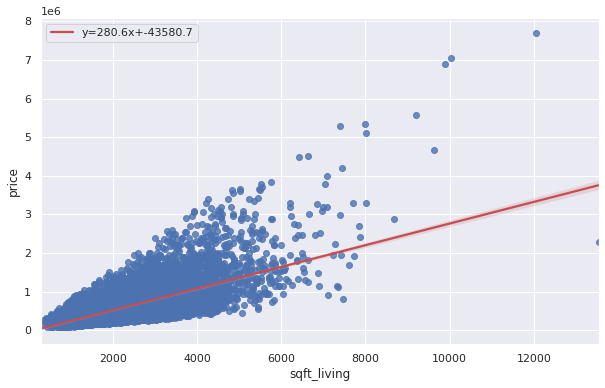

In [37]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset['sqft_living'],dataset['price'])

f = plt.figure(figsize=(10,6))
data = dataset[['price','sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, 
                 scatter_kws={"color": "b"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [38]:
print(slope, intercept)

280.6235678974483 -43580.74309447408


In [39]:
print(std_err)

1.9363985519989133


# 4. Linear Regression using Scikit-Learn

In [40]:
xsl = x.values.reshape(-1,1)
ysl = y.values.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1))
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

thetas = np.array((slr.intercept_, slr.coef_)).squeeze()

theta[0] =  [-43580.74309447]
theta[1] =  [[280.6235679]]


<ipython-input-40-00b22a709aea>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  thetas = np.array((slr.intercept_, slr.coef_)).squeeze()


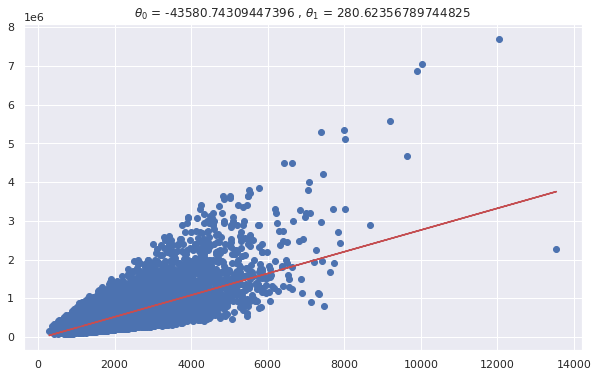

In [41]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl[:,1],y, marker='o', color='b')
plt.plot(xsl[:,1], np.dot(xsl, thetas), 'r')